In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [4]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]
X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 1, 0)

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
pca = PCA(2)

# Checking consistency

In [23]:
def check_consistency(random_state):
    X1, X2 = train_test_split(X, random_state=random_state, test_size = 0.5)
    fig, axs = plt.subplots(3,2, figsize=(16,16))
    for k in range(2,5):
        kmeans = KMeans(k)
        kmeans.fit(X1)
        labels = kmeans.predict(X1)
        X1 = pca.fit_transform(X1)
        df = pd.DataFrame({'x':X1[:,0],
                       'y':X1[:,1],
                       'labels':labels
                      })
        sns.scatterplot(x='x', y='y', hue='labels', data=df, ax=axs[k-2,0], s=200)
        axs[k-2,0].set_title('Kmeans for k={}, subset1'.format(k))
        kmeans.fit(X2)
        labels = kmeans.predict(X2)
        X2 = pca.fit_transform(X2)
        df = pd.DataFrame({'x':X2[:,0],
                       'y':X2[:,1],
                       'labels':labels
                      })
        sns.scatterplot(x='x', y='y', hue='labels', data=df, ax=axs[k-2,1], s=200)
        axs[k-2,1].set_title('Kmeans for k={}, subset 2'.format(k))

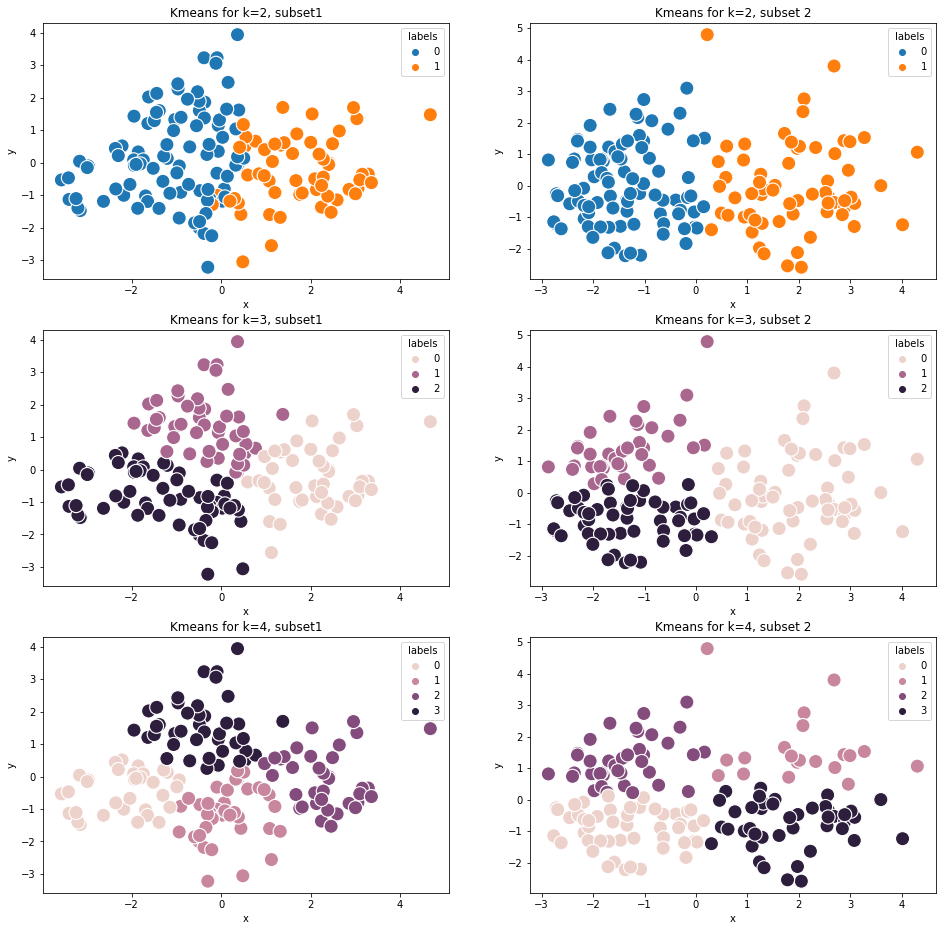

In [24]:
check_consistency(235)

2 and 3 seems consistent, 4 less so

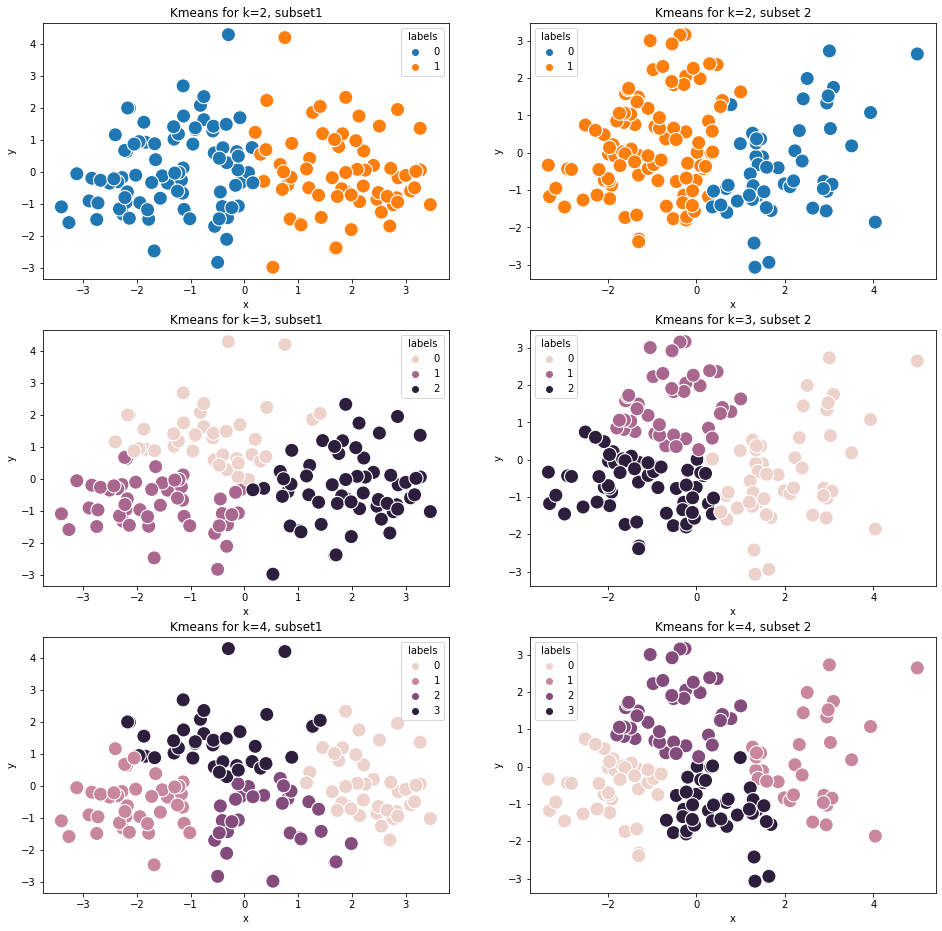

In [25]:
check_consistency(625)

These all seem consistent.  For4, there is a left and right cluster as well as a top center and bottom center cluster.  4 may not be as consistent as the other two

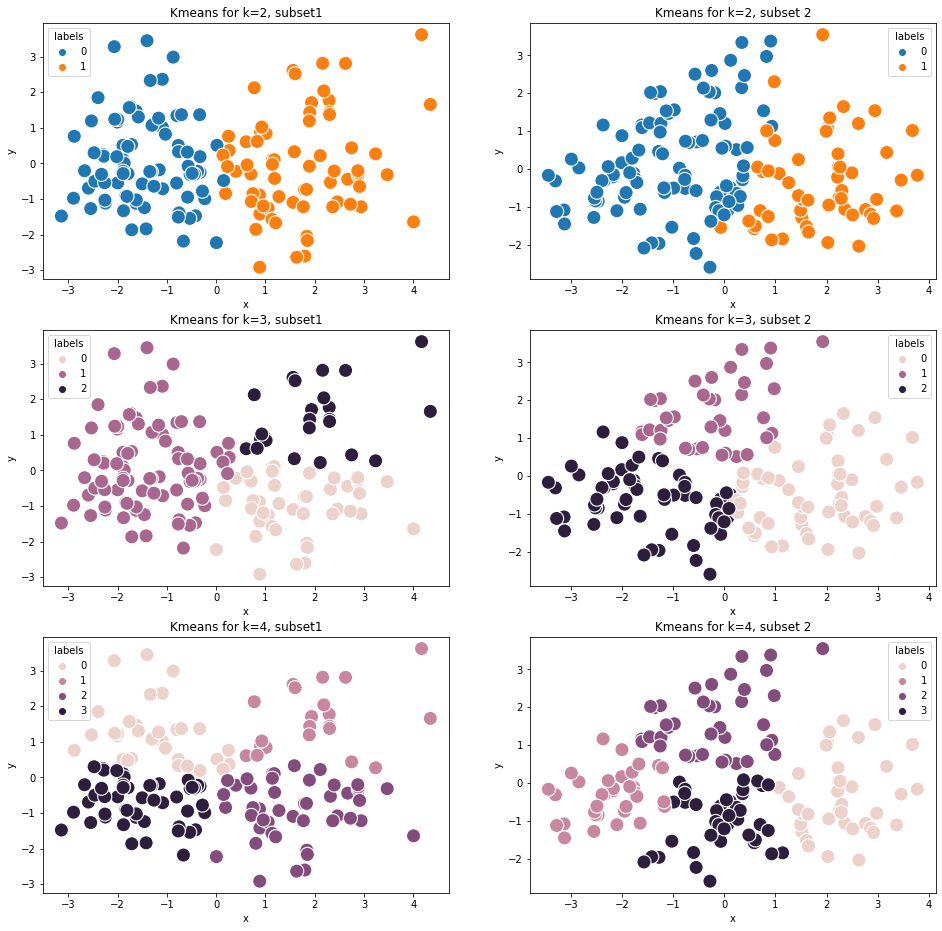

In [26]:
check_consistency(12345)

2 seems the most consistent here. For 3, the second group seems to have 1 top cluster where the other subgroup has one large left cluster and two right clusters, one top and one bottom.  The same with 4.  There are middle clusters in the second group where there is no middle cluster in the first group.

# Adjusted Rand Index

In [29]:
for k in range(2,5):
    kmeans = KMeans(k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    print('ARI for k =',k,adjusted_rand_score(y,preds))
    

ARI for k = 2 0.43808577271698784
ARI for k = 3 0.2740064669723646
ARI for k = 4 0.198375128484543


2 has the best adjusted rand index